✅ Plot saved to: /mnt/e/Project_Scaling_Laws/Network_Analysis/Log10_PCN_vs_Degree_with_10bins.pdf


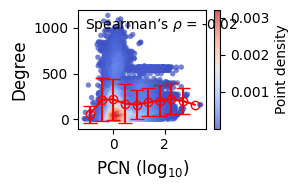

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr
from scipy.stats import gaussian_kde

# 1) Load the data
file_path = "S3_D.csv" 
df = pd.read_csv(file_path)

# 2) Log10 transform the PCN
df['Log10_PCN'] = np.log10(df['PCN'])

# 3) Create bins for Log10(PCN)
num_bins = 10
bins = np.linspace(df['Log10_PCN'].min(), df['Log10_PCN'].max(), num_bins + 1)
df['Bin'] = np.digitize(df['Log10_PCN'], bins)

# 4) Compute mean and std of Degree for each bin
binned_means = []
binned_stds = []
binned_centers = []

for i in range(1, len(bins)):
    bin_mask = df['Bin'] == i
    bin_data = df[bin_mask]['Degree']
    
    if len(bin_data) > 0:
        binned_means.append(bin_data.mean())
        binned_stds.append(bin_data.std())
        binned_centers.append((bins[i-1] + bins[i]) / 2)

# 5) Compute correlations
spearman_corr, _ = spearmanr(df['Log10_PCN'], df['Degree'])
pearson_corr, _ = pearsonr(df['Log10_PCN'], df['Degree'])

# 6) KDE for density
xy = np.vstack([df['Log10_PCN'], df['Degree']])
z = gaussian_kde(xy)(xy)

# 7) Scatter plot
plt.figure(figsize=(3, 2))
sc = plt.scatter(df['Log10_PCN'], df['Degree'], c=z, cmap='coolwarm', alpha=0.7, edgecolor='none', s=15)
plt.colorbar(sc, label='Point density')

# 8) Binned trend line and hollow markers
plt.plot(binned_centers, binned_means, linestyle='-', color='red')
plt.errorbar(
    binned_centers, binned_means, yerr=binned_stds,
    fmt='o', mfc='none', mec='red', ecolor='red', capsize=5
)

# 9) Correlation annotations (proper symbols + formatting)
plt.text(0.05, 0.95, rf"Spearman’s $\rho$ = {spearman_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# 10) Axis labels
plt.xlabel('PCN (log$_{10}$)', fontsize=12)
plt.ylabel('Degree', fontsize=12)

# 11) Save and show
plt.tight_layout()
output_path = 'S3_D.pdf'
plt.savefig(output_path, dpi=1200, format='pdf')
print(f"✅ Plot saved to: {output_path}")

plt.show()


✅ Plot saved to: /mnt/e/Project_Scaling_Laws/Network_Analysis/Log10_Length_vs_Degree_with_10bins_hollow.pdf


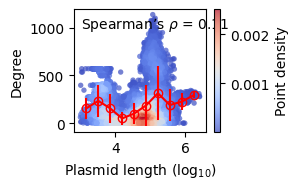

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr
from scipy.stats import gaussian_kde

# 1) Load the dataset
file_path = "S3_D.csv"
df = pd.read_csv(file_path)

# 2) Log10 transform the Plasmid Length
df['Log10_Plasmid_Length'] = np.log10(df['Plasmid_Length'])

# 3) Create 10 bins based on Log10(Plasmid Length)
num_bins = 10
bins = np.linspace(df['Log10_Plasmid_Length'].min(), df['Log10_Plasmid_Length'].max(), num_bins + 1)
df['Bin'] = np.digitize(df['Log10_Plasmid_Length'], bins)

# 4) Compute mean and std of Degree in each bin
binned_means = []
binned_stds = []
binned_centers = []

for i in range(1, len(bins)):
    bin_mask = df['Bin'] == i
    bin_data = df[bin_mask]['Degree']
    
    if len(bin_data) > 0:
        binned_means.append(bin_data.mean())
        binned_stds.append(bin_data.std())
        binned_centers.append((bins[i-1] + bins[i]) / 2)

# 5) Compute correlation
spearman_corr, _ = spearmanr(df['Log10_Plasmid_Length'], df['Degree'])
pearson_corr, _ = pearsonr(df['Log10_Plasmid_Length'], df['Degree'])

# 6) Compute point density using KDE
xy = np.vstack([df['Log10_Plasmid_Length'], df['Degree']])
z = gaussian_kde(xy)(xy)

# 7) Scatter plot with density coloring
plt.figure(figsize=(3, 2))
sc = plt.scatter(
    df['Log10_Plasmid_Length'], df['Degree'],
    c=z, cmap='coolwarm', alpha=0.7, edgecolor='none', s=15
)
plt.colorbar(sc, label='Point density')

# 8) Plot binned average line and hollow markers
plt.plot(binned_centers, binned_means, linestyle='-', color='red')
plt.errorbar(
    binned_centers, binned_means, yerr=binned_stds,
    fmt='o', mfc='none', mec='red', ecolor='red'
)

# 9) Add correlation values
plt.text(0.05, 0.95, rf"Spearman’s $\rho$ = {spearman_corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')


# 10) Labels
plt.xlabel("Plasmid length (log$_{10}$)", fontsize=10)
plt.ylabel("Degree", fontsize=10)

# 11) Layout and save
plt.tight_layout()
output_path = 'S3_E.pdf'
plt.savefig(output_path, dpi=1200, format='pdf')
print(f"✅ Plot saved to: {output_path}")

plt.show()
